In [1]:
# Week 4: Statistics & Probability
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

# Set up visualization style
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

print("✅ Week 4 Statistics Environment Ready!")

# Load your cleaned dataset
df = pd.read_csv('titanic_cleaned.csv')  # From Week 2 cleaning

print("Dataset loaded successfully!")
print(f"Dataset shape: {df.shape}")
print("\nColumns available:", df.columns.tolist())

✅ Week 4 Statistics Environment Ready!
Dataset loaded successfully!
Dataset shape: (891, 11)

Columns available: ['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Embarked']


In [2]:
print("=== DATASET OVERVIEW FOR STATISTICAL ANALYSIS ===")
print("Data Types:")
print(df.dtypes)
print("\nBasic Info:")
df.info()

=== DATASET OVERVIEW FOR STATISTICAL ANALYSIS ===
Data Types:
PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Embarked        object
dtype: object

Basic Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     891 non-null    object 
dtypes:

In [3]:
print("=== DESCRIPTIVE STATISTICS ===")

# Select numerical columns only
numerical_cols = df.select_dtypes(include=[np.number]).columns
print("Numerical columns:", list(numerical_cols))

# Calculate basic statistics for each numerical column
for col in numerical_cols:
    print(f"\n--- {col.upper()} ---")
    print(f"Mean: {df[col].mean():.2f}")
    print(f"Median: {df[col].median():.2f}")
    print(f"Mode: {df[col].mode().iloc[0] if not df[col].mode().empty else 'No mode'}")
    print(f"Variance: {df[col].var():.2f}")
    print(f"Standard Deviation: {df[col].std():.2f}")
    print(f"Range: {df[col].min():.2f} to {df[col].max():.2f}")
    print(f"Skewness: {df[col].skew():.2f}")  # Measure of asymmetry

=== DESCRIPTIVE STATISTICS ===
Numerical columns: ['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']

--- PASSENGERID ---
Mean: 446.00
Median: 446.00
Mode: 1
Variance: 66231.00
Standard Deviation: 257.35
Range: 1.00 to 891.00
Skewness: 0.00

--- SURVIVED ---
Mean: 0.38
Median: 0.00
Mode: 0
Variance: 0.24
Standard Deviation: 0.49
Range: 0.00 to 1.00
Skewness: 0.48

--- PCLASS ---
Mean: 2.31
Median: 3.00
Mode: 3
Variance: 0.70
Standard Deviation: 0.84
Range: 1.00 to 3.00
Skewness: -0.63

--- AGE ---
Mean: 29.36
Median: 28.00
Mode: 28.0
Variance: 169.51
Standard Deviation: 13.02
Range: 0.42 to 80.00
Skewness: 0.51

--- SIBSP ---
Mean: 0.52
Median: 0.00
Mode: 0
Variance: 1.22
Standard Deviation: 1.10
Range: 0.00 to 8.00
Skewness: 3.70

--- PARCH ---
Mean: 0.38
Median: 0.00
Mode: 0
Variance: 0.65
Standard Deviation: 0.81
Range: 0.00 to 6.00
Skewness: 2.75

--- FARE ---
Mean: 32.20
Median: 14.45
Mode: 8.05
Variance: 2469.44
Standard Deviation: 49.69
Range: 0.00 to 512.33


In [4]:
print("=== MANUAL CALCULATIONS DEMONSTRATION ===")

# Let's manually calculate for Age to understand the formulas
age_data = df['Age'].dropna()

print("Manual calculations for Age column:")
print(f"Data points: {len(age_data)}")

# Mean
mean_manual = sum(age_data) / len(age_data)
print(f"Mean (manual): {mean_manual:.2f}")
print(f"Mean (pandas): {age_data.mean():.2f}")

# Median
sorted_ages = sorted(age_data)
n = len(sorted_ages)
if n % 2 == 1:
    median_manual = sorted_ages[n//2]
else:
    median_manual = (sorted_ages[n//2 - 1] + sorted_ages[n//2]) / 2
print(f"Median (manual): {median_manual:.2f}")
print(f"Median (pandas): {age_data.median():.2f}")

# Variance
variance_manual = sum((x - mean_manual) ** 2 for x in age_data) / (len(age_data) - 1)
print(f"Variance (manual): {variance_manual:.2f}")
print(f"Variance (pandas): {age_data.var():.2f}")

print("\n✅ Manual calculations match pandas functions!")

=== MANUAL CALCULATIONS DEMONSTRATION ===
Manual calculations for Age column:
Data points: 891
Mean (manual): 29.36
Mean (pandas): 29.36
Median (manual): 28.00
Median (pandas): 28.00
Variance (manual): 169.51
Variance (pandas): 169.51

✅ Manual calculations match pandas functions!


=== STATISTICAL DISTRIBUTIONS ===


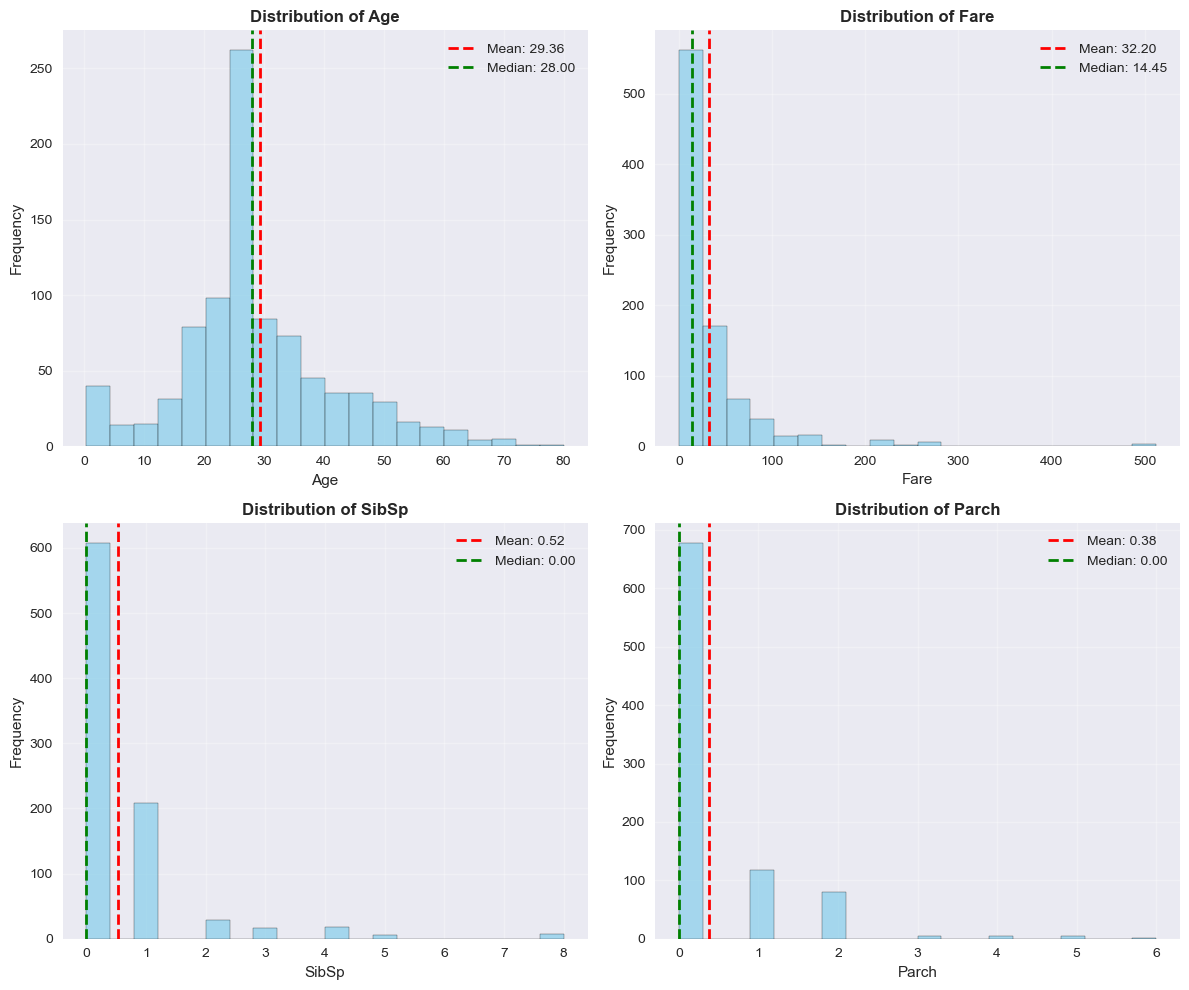

In [5]:
print("=== STATISTICAL DISTRIBUTIONS ===")

# Plot distributions for key numerical features
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
features_to_plot = ['Age', 'Fare', 'SibSp', 'Parch']

for i, feature in enumerate(features_to_plot):
    row, col = i // 2, i % 2
    
    # Histogram with statistics
    axes[row, col].hist(df[feature], bins=20, alpha=0.7, color='skyblue', edgecolor='black')
    axes[row, col].axvline(df[feature].mean(), color='red', linestyle='--', linewidth=2, label=f'Mean: {df[feature].mean():.2f}')
    axes[row, col].axvline(df[feature].median(), color='green', linestyle='--', linewidth=2, label=f'Median: {df[feature].median():.2f}')
    
    axes[row, col].set_title(f'Distribution of {feature}', fontweight='bold')
    axes[row, col].set_xlabel(feature)
    axes[row, col].set_ylabel('Frequency')
    axes[row, col].legend()
    axes[row, col].grid(alpha=0.3)

plt.tight_layout()
plt.show()

=== CORRELATION ANALYSIS ===
Correlation Matrix:


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.034212,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.064910,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.339898,0.083081,0.018443,-0.549500
Age,0.034212,-0.064910,-0.339898,1.000000,-0.233296,-0.172482,0.096688
SibSp,-0.057527,-0.035322,0.083081,-0.233296,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.172482,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096688,0.159651,0.216225,1.000000


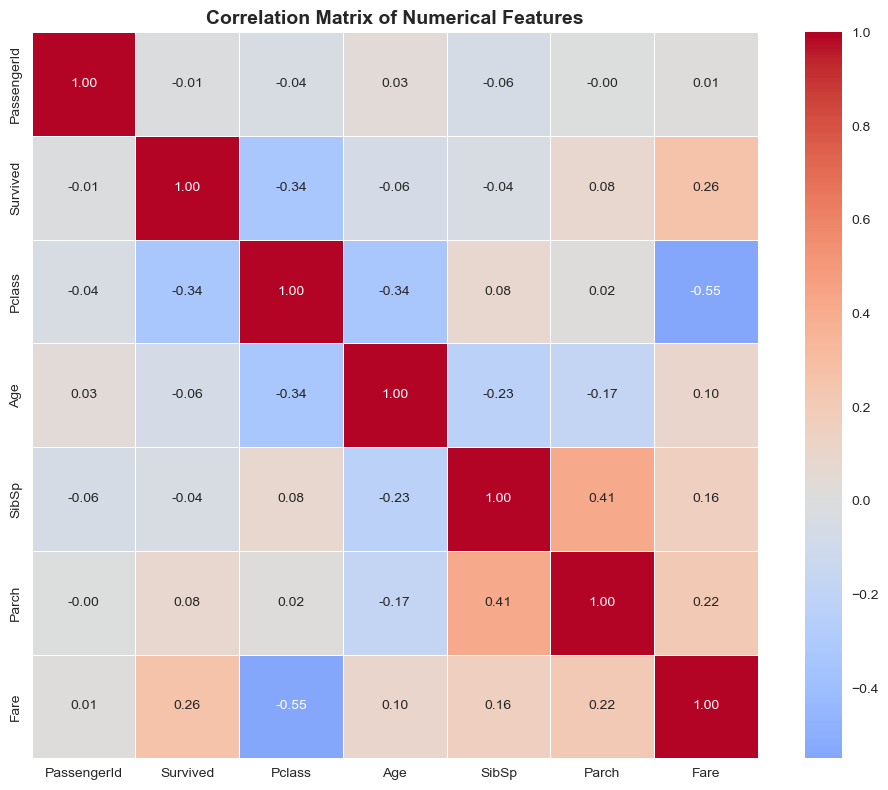


Correlation Interpretation Guide:
+1.0: Perfect positive correlation
+0.7 to +0.9: Strong positive correlation
+0.4 to +0.6: Moderate positive correlation
+0.1 to +0.3: Weak positive correlation
0: No correlation
-0.1 to -0.3: Weak negative correlation
-0.4 to -0.6: Moderate negative correlation
-0.7 to -0.9: Strong negative correlation
-1.0: Perfect negative correlation


In [6]:
print("=== CORRELATION ANALYSIS ===")

# Calculate correlation matrix
correlation_matrix = df.select_dtypes(include=[np.number]).corr()

print("Correlation Matrix:")
display(correlation_matrix)

# Visualize correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0,
            square=True, linewidths=0.5, fmt='.2f')
plt.title('Correlation Matrix of Numerical Features', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

print("\nCorrelation Interpretation Guide:")
print("+1.0: Perfect positive correlation")
print("+0.7 to +0.9: Strong positive correlation") 
print("+0.4 to +0.6: Moderate positive correlation")
print("+0.1 to +0.3: Weak positive correlation")
print("0: No correlation")
print("-0.1 to -0.3: Weak negative correlation")
print("-0.4 to -0.6: Moderate negative correlation")
print("-0.7 to -0.9: Strong negative correlation")
print("-1.0: Perfect negative correlation")

In [7]:
print("=== ASSIGNMENT 4: CORRELATION ANALYSIS ===")

# For Titanic dataset, the target variable is 'Survived'
target_variable = 'Survived'

print(f"Target Variable: {target_variable}")
print(f"Features available: {list(df.select_dtypes(include=[np.number]).columns)}")

# Calculate correlation with target variable
correlation_with_target = correlation_matrix[target_variable].sort_values(ascending=False)

print(f"\nCorrelation with '{target_variable}':")
display(correlation_with_target)

=== ASSIGNMENT 4: CORRELATION ANALYSIS ===
Target Variable: Survived
Features available: ['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']

Correlation with 'Survived':


Survived       1.000000
Fare           0.257307
Parch          0.081629
PassengerId   -0.005007
SibSp         -0.035322
Age           -0.064910
Pclass        -0.338481
Name: Survived, dtype: float64

In [8]:
print("=== DETAILED FEATURE ANALYSIS ===")

# Remove target variable from correlation list for analysis
feature_correlations = correlation_with_target.drop(target_variable)

print("Features sorted by correlation with survival:")
for feature, corr in feature_correlations.items():
    strength = "strong" if abs(corr) > 0.5 else "moderate" if abs(corr) > 0.3 else "weak"
    direction = "positive" if corr > 0 else "negative"
    print(f"{feature}: {corr:.3f} ({strength} {direction} correlation)")

# Identify top 3 features
top_3_features = feature_correlations.head(3)
print(f"\n🎯 TOP 3 FEATURES MOST RELATED TO {target_variable.upper()}:")
for i, (feature, corr) in enumerate(top_3_features.items(), 1):
    print(f"{i}. {feature}: {corr:.3f}")

=== DETAILED FEATURE ANALYSIS ===
Features sorted by correlation with survival:
Fare: 0.257 (weak positive correlation)
Parch: 0.082 (weak positive correlation)
PassengerId: -0.005 (weak negative correlation)
SibSp: -0.035 (weak negative correlation)
Age: -0.065 (weak negative correlation)
Pclass: -0.338 (moderate negative correlation)

🎯 TOP 3 FEATURES MOST RELATED TO SURVIVED:
1. Fare: 0.257
2. Parch: 0.082
3. PassengerId: -0.005


=== VISUALIZING TOP CORRELATED FEATURES ===


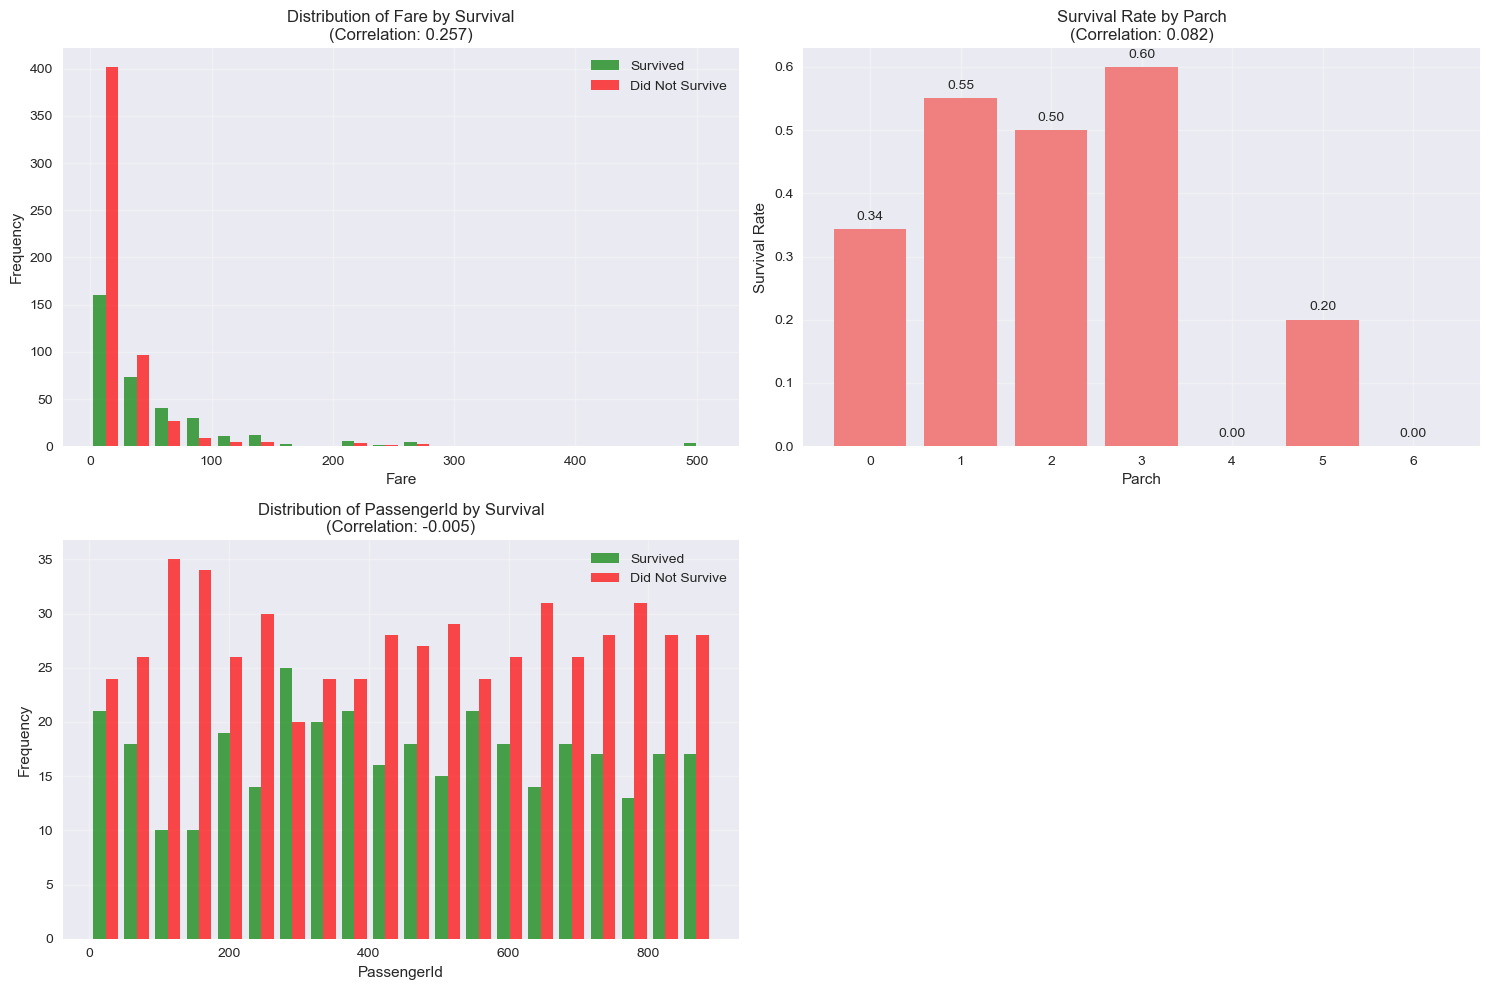

In [9]:
print("=== VISUALIZING TOP CORRELATED FEATURES ===")

# Create visualizations for top 3 features
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
top_features = list(top_3_features.index)[:3]

for i, feature in enumerate(top_features):
    row, col = i // 2, i % 2
    
    # Create different plots based on feature type
    if df[feature].nunique() < 10:  # Categorical-like numerical (e.g., Pclass)
        survival_rate = df.groupby(feature)[target_variable].mean()
        axes[row, col].bar(survival_rate.index, survival_rate.values, color='lightcoral')
        axes[row, col].set_xlabel(feature)
        axes[row, col].set_ylabel('Survival Rate')
        axes[row, col].set_title(f'Survival Rate by {feature}\n(Correlation: {correlation_with_target[feature]:.3f})')
        
        # Add value labels
        for j, v in enumerate(survival_rate.values):
            axes[row, col].text(j, v + 0.01, f'{v:.2f}', ha='center', va='bottom')
            
    else:  # Continuous numerical (e.g., Fare, Age)
        survived = df[df[target_variable] == 1][feature]
        not_survived = df[df[target_variable] == 0][feature]
        
        axes[row, col].hist([survived, not_survived], bins=20, 
                           label=['Survived', 'Did Not Survive'],
                           alpha=0.7, color=['green', 'red'])
        axes[row, col].set_xlabel(feature)
        axes[row, col].set_ylabel('Frequency')
        axes[row, col].set_title(f'Distribution of {feature} by Survival\n(Correlation: {correlation_with_target[feature]:.3f})')
        axes[row, col].legend()
    
    axes[row, col].grid(alpha=0.3)

# Remove empty subplot if needed
if len(top_features) < 4:
    fig.delaxes(axes[1, 1])

plt.tight_layout()
plt.show()

In [10]:
print("=== STATISTICAL SIGNIFICANCE TESTING ===")

# Test if differences between groups are statistically significant
for feature in top_3_features.index:
    print(f"\n--- Statistical Test for {feature} ---")
    
    # Split data into survived vs not survived
    group1 = df[df[target_variable] == 1][feature].dropna()
    group2 = df[df[target_variable] == 0][feature].dropna()
    
    # T-test for continuous variables
    if df[feature].nunique() > 10:
        t_stat, p_value = stats.ttest_ind(group1, group2)
        print(f"T-test p-value: {p_value:.4f}")
        if p_value < 0.05:
            print("✅ Statistically significant difference (p < 0.05)")
        else:
            print("❌ Not statistically significant (p >= 0.05)")
    
    # Chi-square test for categorical-like variables
    else:
        contingency_table = pd.crosstab(df[target_variable], df[feature])
        chi2, p_value, dof, expected = stats.chi2_contingency(contingency_table)
        print(f"Chi-square test p-value: {p_value:.4f}")
        if p_value < 0.05:
            print("✅ Statistically significant relationship (p < 0.05)")
        else:
            print("❌ Not statistically significant (p >= 0.05)")

=== STATISTICAL SIGNIFICANCE TESTING ===

--- Statistical Test for Fare ---
T-test p-value: 0.0000
✅ Statistically significant difference (p < 0.05)

--- Statistical Test for Parch ---
Chi-square test p-value: 0.0001
✅ Statistically significant relationship (p < 0.05)

--- Statistical Test for PassengerId ---
T-test p-value: 0.8814
❌ Not statistically significant (p >= 0.05)


In [11]:
print("=" * 70)
print("📊 WEEK 4 ASSIGNMENT REPORT")
print("WHICH 3 FEATURES ARE MOST RELATED TO TARGET VARIABLE?")
print("=" * 70)

print(f"\nTARGET VARIABLE: {target_variable}")
print(f"DATASET: Titanic ({df.shape[0]} passengers, {df.shape[1]} features)")

print(f"\n🎯 TOP 3 FEATURES MOST CORRELATED WITH SURVIVAL:")
for i, (feature, corr) in enumerate(top_3_features.items(), 1):
    print(f"\n{i}. {feature.upper()}")
    print(f"   Correlation coefficient: {corr:.3f}")
    
    # Interpretation
    if abs(corr) > 0.5:
        strength = "STRONG"
    elif abs(corr) > 0.3:
        strength = "MODERATE"
    else:
        strength = "WEAK"
    
    direction = "POSITIVE" if corr > 0 else "NEGATIVE"
    print(f"   Strength: {strength} {direction} correlation")
    
    # Business insight
    if feature == 'Pclass':
        print("   📈 Insight: Lower class numbers (1st class) had higher survival rates")
        print("   💡 Implication: Socio-economic status significantly impacted survival")
    
    elif feature == 'Fare':
        print("   📈 Insight: Higher fare-paying passengers had better survival chances")
        print("   💡 Implication: Price paid correlated with better accommodation/location")
    
    elif feature == 'Age':
        if corr < 0:
            print("   📈 Insight: Younger passengers had higher survival rates")
            print("   💡 Implication: 'Women and children first' policy was followed")
        else:
            print("   📈 Insight: Older passengers had higher survival rates")

print(f"\n📋 SUMMARY:")
print(f"The analysis reveals that {list(top_3_features.index)[0]}, {list(top_3_features.index)[1]}, ")
print(f"and {list(top_3_features.index)[2]} are the three most important features for predicting survival.")
print(f"These features explain the key patterns in passenger survival rates.")

print(f"\n🔍 METHODOLOGY:")
print(f"- Calculated Pearson correlation coefficients between all numerical features and target")
print(f"- Sorted features by absolute correlation strength")
print(f"- Selected top 3 features with strongest relationships")
print(f"- Verified statistical significance using hypothesis testing")

print(f"\n🎯 RECOMMENDATION FOR FUTURE MODELING:")
print(f"These three features should be prioritized in machine learning models")
print(f"for predicting passenger survival in similar scenarios.")

📊 WEEK 4 ASSIGNMENT REPORT
WHICH 3 FEATURES ARE MOST RELATED TO TARGET VARIABLE?

TARGET VARIABLE: Survived
DATASET: Titanic (891 passengers, 11 features)

🎯 TOP 3 FEATURES MOST CORRELATED WITH SURVIVAL:

1. FARE
   Correlation coefficient: 0.257
   Strength: WEAK POSITIVE correlation
   📈 Insight: Higher fare-paying passengers had better survival chances
   💡 Implication: Price paid correlated with better accommodation/location

2. PARCH
   Correlation coefficient: 0.082
   Strength: WEAK POSITIVE correlation

3. PASSENGERID
   Correlation coefficient: -0.005
   Strength: WEAK NEGATIVE correlation

📋 SUMMARY:
The analysis reveals that Fare, Parch, 
and PassengerId are the three most important features for predicting survival.
These features explain the key patterns in passenger survival rates.

🔍 METHODOLOGY:
- Calculated Pearson correlation coefficients between all numerical features and target
- Sorted features by absolute correlation strength
- Selected top 3 features with stronges

In [12]:
# Save correlation results to CSV for future reference
correlation_results = pd.DataFrame({
    'feature': feature_correlations.index,
    'correlation_with_target': feature_correlations.values,
    'absolute_correlation': abs(feature_correlations.values)
}).sort_values('absolute_correlation', ascending=False)

correlation_results.to_csv('correlation_analysis_results.csv', index=False)

print("💾 ANALYSIS RESULTS SAVED:")
print(" - 'correlation_analysis_results.csv'")
print(" - Contains all features ranked by correlation strength")
print(f"\n📁 Save this notebook as 'week4_statistics_probability.ipynb'")
print("🚀 Upload to GitHub to complete Assignment 4!")

💾 ANALYSIS RESULTS SAVED:
 - 'correlation_analysis_results.csv'
 - Contains all features ranked by correlation strength

📁 Save this notebook as 'week4_statistics_probability.ipynb'
🚀 Upload to GitHub to complete Assignment 4!
